# **About AIRBNB**:is an American vacation rental online marketplace company based in San Francisco, California, United States. Airbnb offers arrangement for lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

**AFTER IMPORTING NECESSARY LIBRARIES, we read the data from kaggle inputs**

In [2]:
NYC=pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
NYC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


> **WE CHECK FOR MISSING VALUES AND GET ALL REQUIRED INFORMATION FOR OUR TARGET VARIABLE**

In [3]:
NYC.shape

(48895, 16)

In [4]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
NYC.duplicated().sum()
NYC.drop_duplicates(inplace=True)

In [6]:
NYC.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
NYC.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [8]:
NYC.tail()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2
48894,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,1,23


In [9]:
NYC.isnull().sum()
NYC.dropna(how='any',inplace=True)
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         38843 non-null  int64  
 1   neighbourhood_group             38843 non-null  object 
 2   neighbourhood                   38843 non-null  object 
 3   latitude                        38843 non-null  float64
 4   longitude                       38843 non-null  float64
 5   room_type                       38843 non-null  object 
 6   price                           38843 non-null  int64  
 7   minimum_nights                  38843 non-null  int64  
 8   number_of_reviews               38843 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  38843 non-null  int64  
 11  availability_365                38843 non-null  int64  
dtypes: float64(3), int64(6), object(

In [10]:
NYC.fillna({'reviews_per_month':0}, inplace=True)
NYC.reviews_per_month.isnull().sum()


0

In [11]:
NYC.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
NYC.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

# VISUALIZATION OF THE ENTIRE DATASET

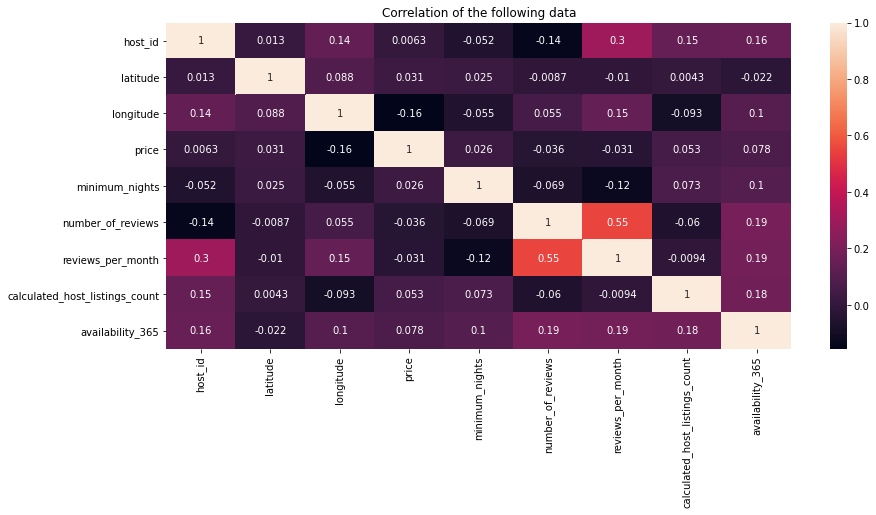

In [13]:
plt.figure(figsize=(14,6))
sns.heatmap(NYC.corr(),annot=True)
plt.title("Correlation of the following data");


Text(0.5, 1.0, 'NEIGHBOURHOOD GROUPS')

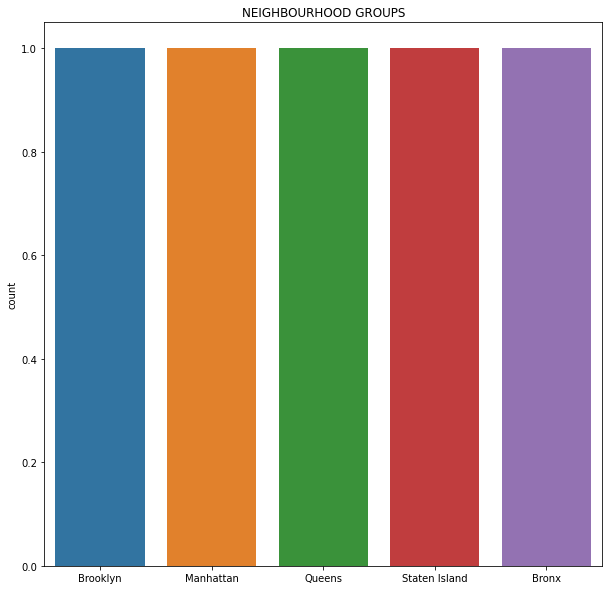

In [14]:
neighbourhoodC=NYC.neighbourhood_group.unique()
sns.countplot(neighbourhoodC)

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('NEIGHBOURHOOD GROUPS')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

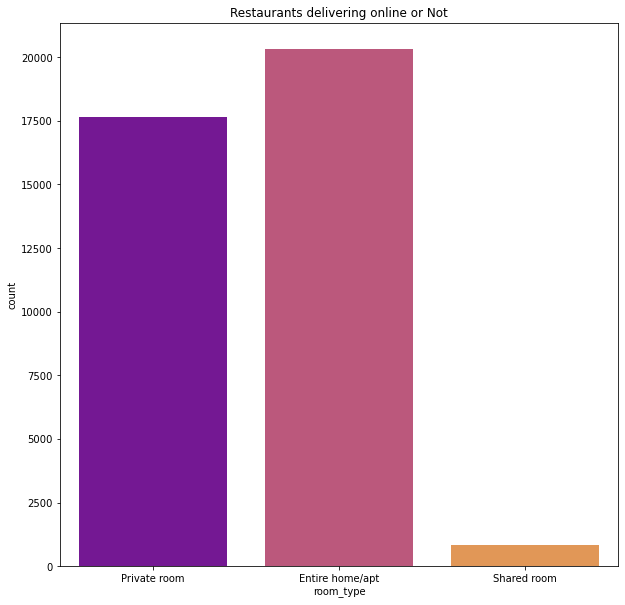

In [15]:
#Restaurants delivering Online or not
sns.countplot(NYC['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Text(0, 0.5, 'Availability 365 days')

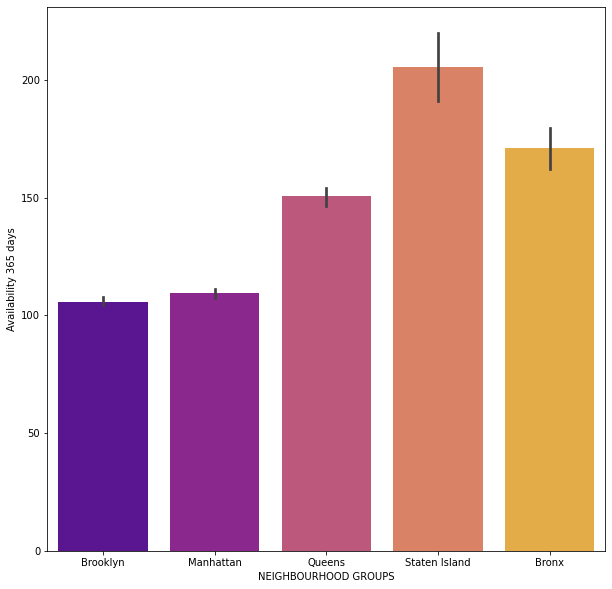

In [16]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=NYC, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.xlabel('NEIGHBOURHOOD GROUPS')
plt.ylabel('Availability 365 days')

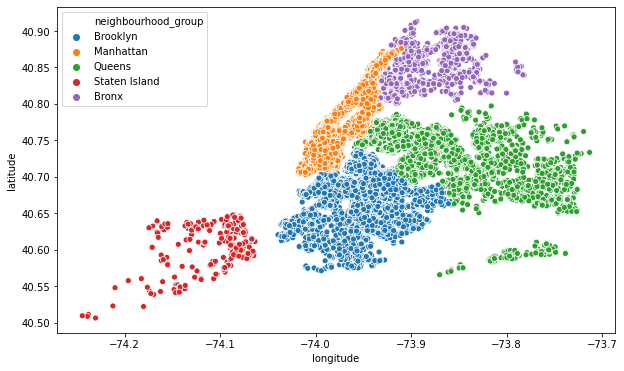

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(NYC.longitude,NYC.latitude,hue=NYC.neighbourhood_group)
plt.ioff()

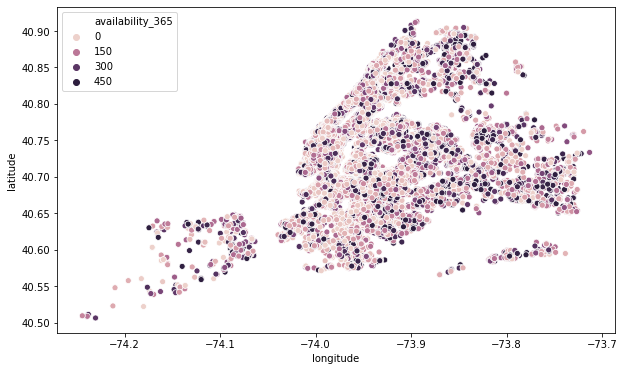

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(NYC.longitude,NYC.latitude,hue=NYC.availability_365)
plt.ioff()

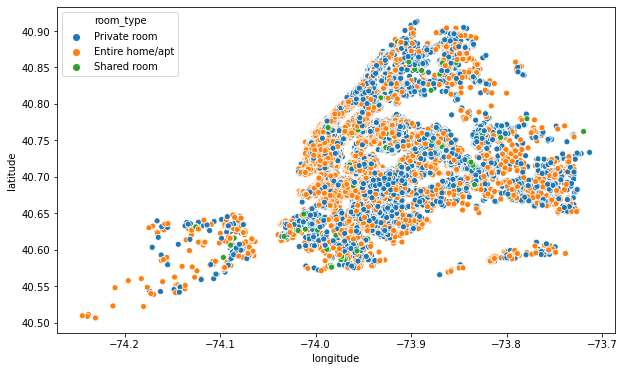

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(NYC.longitude,NYC.latitude,hue=NYC.room_type)
plt.ioff()

# **MODEL BUILDING**

we remove unwanted columns from our dataset

In [20]:
NYC.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
NYC.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
5,Manhattan,Entire home/apt,200,3,1,129


In [21]:
NYC.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [22]:


    
for column in NYC.columns[NYC.columns.isin(['neighbourhood_group','room_type'])]:
        NYC[column] = NYC[column].factorize()[0]

In [23]:
NYC.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

In [25]:
NYC.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [26]:
X=NYC[['neighbourhood_group', 'room_type','minimum_nights',
       'calculated_host_listings_count', 'availability_365']]
y=NYC['price']
print(X)
print(y)

       neighbourhood_group  room_type  minimum_nights  \
0                        0          0               1   
1                        1          1               1   
3                        0          1               1   
4                        1          1              10   
5                        1          1               3   
...                    ...        ...             ...   
48782                    1          0               1   
48790                    2          0               1   
48799                    3          0               1   
48805                    4          1               1   
48852                    0          0               1   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
3                                   1               194  
4                                   1                 0  
5                        

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

X_train.shape

(31074, 5)

In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(min_samples_leaf=.0001)
model.fit(X_train, y_train)
model.score(X_train,y_train)

0.39698634959960244

In [32]:
NN_model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'),
                                      tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'),
                                      tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'),
                                      tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'),
                                      tf.keras.layers.Dense(1, kernel_initializer='normal',activation='linear')])





NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________


In [33]:
NN_model.fit(X, y, epochs=500, batch_size=32, validation_split = 0.2) 

Epoch 1/500
972/972 [==============================] - 3s 3ms/step - loss: 67.7997 - mean_absolute_error: 67.7997 - val_loss: 78.7212 - val_mean_absolute_error: 78.7212
Epoch 2/500
972/972 [==============================] - 3s 3ms/step - loss: 59.9044 - mean_absolute_error: 59.9044 - val_loss: 78.8394 - val_mean_absolute_error: 78.8394
Epoch 3/500
972/972 [==============================] - 2s 3ms/step - loss: 59.1024 - mean_absolute_error: 59.1024 - val_loss: 72.7702 - val_mean_absolute_error: 72.7702
Epoch 4/500
972/972 [==============================] - 2s 2ms/step - loss: 57.9027 - mean_absolute_error: 57.9027 - val_loss: 72.8391 - val_mean_absolute_error: 72.8391
Epoch 5/500
972/972 [==============================] - 3s 3ms/step - loss: 57.3289 - mean_absolute_error: 57.3289 - val_loss: 68.5698 - val_mean_absolute_error: 68.5698
Epoch 6/500
972/972 [==============================] - 3s 3ms/step - loss: 57.0939 - mean_absolute_error: 57.0939 - val_loss: 76.0773 - val_mean_absolute_e

972/972 [==============================] - 2s 2ms/step - loss: 52.5840 - mean_absolute_error: 52.5840 - val_loss: 69.7751 - val_mean_absolute_error: 69.7751
Epoch 50/500
972/972 [==============================] - 3s 3ms/step - loss: 52.4520 - mean_absolute_error: 52.4520 - val_loss: 70.3449 - val_mean_absolute_error: 70.3449
Epoch 51/500
972/972 [==============================] - 2s 3ms/step - loss: 52.5217 - mean_absolute_error: 52.5217 - val_loss: 62.8782 - val_mean_absolute_error: 62.8782
Epoch 52/500
972/972 [==============================] - 3s 3ms/step - loss: 52.5136 - mean_absolute_error: 52.5136 - val_loss: 62.8767 - val_mean_absolute_error: 62.8767
Epoch 53/500
972/972 [==============================] - 2s 2ms/step - loss: 52.5522 - mean_absolute_error: 52.5522 - val_loss: 69.2668 - val_mean_absolute_error: 69.2668
Epoch 54/500
972/972 [==============================] - 2s 2ms/step - loss: 52.5017 - mean_absolute_error: 52.5017 - val_loss: 81.4975 - val_mean_absolute_error: 8

972/972 [==============================] - 3s 3ms/step - loss: 52.0337 - mean_absolute_error: 52.0337 - val_loss: 63.7063 - val_mean_absolute_error: 63.7063
Epoch 98/500
972/972 [==============================] - 3s 3ms/step - loss: 51.9675 - mean_absolute_error: 51.9675 - val_loss: 62.4641 - val_mean_absolute_error: 62.4641
Epoch 99/500
972/972 [==============================] - 3s 3ms/step - loss: 52.1595 - mean_absolute_error: 52.1595 - val_loss: 63.8887 - val_mean_absolute_error: 63.8887
Epoch 100/500
972/972 [==============================] - 3s 3ms/step - loss: 51.9639 - mean_absolute_error: 51.9639 - val_loss: 67.8988 - val_mean_absolute_error: 67.8988
Epoch 101/500
972/972 [==============================] - 2s 2ms/step - loss: 52.0413 - mean_absolute_error: 52.0413 - val_loss: 65.1657 - val_mean_absolute_error: 65.1657
Epoch 102/500
972/972 [==============================] - 2s 2ms/step - loss: 52.0018 - mean_absolute_error: 52.0018 - val_loss: 65.1620 - val_mean_absolute_error

972/972 [==============================] - 3s 3ms/step - loss: 51.7730 - mean_absolute_error: 51.7730 - val_loss: 71.4861 - val_mean_absolute_error: 71.4861
Epoch 146/500
972/972 [==============================] - 3s 3ms/step - loss: 51.7509 - mean_absolute_error: 51.7509 - val_loss: 70.2865 - val_mean_absolute_error: 70.2865
Epoch 147/500
972/972 [==============================] - 3s 3ms/step - loss: 51.7378 - mean_absolute_error: 51.7378 - val_loss: 69.2022 - val_mean_absolute_error: 69.2022
Epoch 148/500
972/972 [==============================] - 3s 3ms/step - loss: 51.7322 - mean_absolute_error: 51.7322 - val_loss: 96.0963 - val_mean_absolute_error: 96.0963
Epoch 149/500
972/972 [==============================] - 3s 3ms/step - loss: 51.7318 - mean_absolute_error: 51.7318 - val_loss: 65.1325 - val_mean_absolute_error: 65.1325
Epoch 150/500
972/972 [==============================] - 3s 3ms/step - loss: 51.7403 - mean_absolute_error: 51.7403 - val_loss: 87.8540 - val_mean_absolute_err

Epoch 193/500
972/972 [==============================] - 2s 3ms/step - loss: 51.4565 - mean_absolute_error: 51.4565 - val_loss: 96.7383 - val_mean_absolute_error: 96.7383
Epoch 194/500
972/972 [==============================] - 2s 2ms/step - loss: 51.5076 - mean_absolute_error: 51.5076 - val_loss: 73.7907 - val_mean_absolute_error: 73.7907
Epoch 195/500
972/972 [==============================] - 3s 3ms/step - loss: 51.5291 - mean_absolute_error: 51.5291 - val_loss: 74.2531 - val_mean_absolute_error: 74.2531
Epoch 196/500
972/972 [==============================] - 3s 3ms/step - loss: 51.5050 - mean_absolute_error: 51.5050 - val_loss: 87.3032 - val_mean_absolute_error: 87.3032
Epoch 197/500
972/972 [==============================] - 3s 3ms/step - loss: 51.5237 - mean_absolute_error: 51.5237 - val_loss: 86.6241 - val_mean_absolute_error: 86.6241
Epoch 198/500
972/972 [==============================] - 2s 2ms/step - loss: 51.5151 - mean_absolute_error: 51.5151 - val_loss: 94.6777 - val_mea

Epoch 241/500
972/972 [==============================] - 2s 2ms/step - loss: 51.2770 - mean_absolute_error: 51.2770 - val_loss: 74.3248 - val_mean_absolute_error: 74.3248
Epoch 242/500
972/972 [==============================] - 2s 2ms/step - loss: 51.4156 - mean_absolute_error: 51.4156 - val_loss: 66.8008 - val_mean_absolute_error: 66.8008
Epoch 243/500
972/972 [==============================] - 3s 3ms/step - loss: 51.2828 - mean_absolute_error: 51.2828 - val_loss: 76.0594 - val_mean_absolute_error: 76.0594
Epoch 244/500
972/972 [==============================] - 2s 2ms/step - loss: 51.2277 - mean_absolute_error: 51.2277 - val_loss: 72.6576 - val_mean_absolute_error: 72.6576
Epoch 245/500
972/972 [==============================] - 2s 2ms/step - loss: 51.3351 - mean_absolute_error: 51.3351 - val_loss: 64.4086 - val_mean_absolute_error: 64.4086
Epoch 246/500
972/972 [==============================] - 2s 2ms/step - loss: 51.2658 - mean_absolute_error: 51.2658 - val_loss: 75.3900 - val_mea

Epoch 289/500
972/972 [==============================] - 2s 2ms/step - loss: 51.0962 - mean_absolute_error: 51.0962 - val_loss: 106.2170 - val_mean_absolute_error: 106.2170
Epoch 290/500
972/972 [==============================] - 3s 3ms/step - loss: 51.1247 - mean_absolute_error: 51.1247 - val_loss: 93.3562 - val_mean_absolute_error: 93.3562
Epoch 291/500
972/972 [==============================] - 2s 2ms/step - loss: 51.0043 - mean_absolute_error: 51.0043 - val_loss: 77.2391 - val_mean_absolute_error: 77.2391
Epoch 292/500
972/972 [==============================] - 2s 2ms/step - loss: 51.2044 - mean_absolute_error: 51.2044 - val_loss: 78.2489 - val_mean_absolute_error: 78.2489
Epoch 293/500
972/972 [==============================] - 2s 2ms/step - loss: 51.1509 - mean_absolute_error: 51.1509 - val_loss: 93.9256 - val_mean_absolute_error: 93.9256
Epoch 294/500
972/972 [==============================] - 3s 3ms/step - loss: 51.3211 - mean_absolute_error: 51.3211 - val_loss: 67.2402 - val_m

Epoch 337/500
972/972 [==============================] - 3s 3ms/step - loss: 50.7610 - mean_absolute_error: 50.7610 - val_loss: 99.3409 - val_mean_absolute_error: 99.3409
Epoch 338/500
972/972 [==============================] - 3s 3ms/step - loss: 50.7829 - mean_absolute_error: 50.7829 - val_loss: 105.9707 - val_mean_absolute_error: 105.9707
Epoch 339/500
972/972 [==============================] - 3s 3ms/step - loss: 50.7166 - mean_absolute_error: 50.7166 - val_loss: 94.9622 - val_mean_absolute_error: 94.9622
Epoch 340/500
972/972 [==============================] - 3s 3ms/step - loss: 50.7455 - mean_absolute_error: 50.7455 - val_loss: 85.9464 - val_mean_absolute_error: 85.9464
Epoch 341/500
972/972 [==============================] - 2s 2ms/step - loss: 50.7534 - mean_absolute_error: 50.7534 - val_loss: 113.2034 - val_mean_absolute_error: 113.2034
Epoch 342/500
972/972 [==============================] - 3s 3ms/step - loss: 50.6167 - mean_absolute_error: 50.6167 - val_loss: 94.8128 - val

Epoch 385/500
972/972 [==============================] - 3s 3ms/step - loss: 50.7786 - mean_absolute_error: 50.7786 - val_loss: 95.5286 - val_mean_absolute_error: 95.5286
Epoch 386/500
972/972 [==============================] - 2s 2ms/step - loss: 50.9598 - mean_absolute_error: 50.9598 - val_loss: 119.0308 - val_mean_absolute_error: 119.0308
Epoch 387/500
972/972 [==============================] - 2s 2ms/step - loss: 50.8922 - mean_absolute_error: 50.8922 - val_loss: 93.1316 - val_mean_absolute_error: 93.1316
Epoch 388/500
972/972 [==============================] - 2s 2ms/step - loss: 50.4081 - mean_absolute_error: 50.4081 - val_loss: 110.1153 - val_mean_absolute_error: 110.1153
Epoch 389/500
972/972 [==============================] - 3s 3ms/step - loss: 51.0929 - mean_absolute_error: 51.0929 - val_loss: 96.5145 - val_mean_absolute_error: 96.5145
Epoch 390/500
972/972 [==============================] - 3s 3ms/step - loss: 50.6437 - mean_absolute_error: 50.6437 - val_loss: 95.1377 - val

972/972 [==============================] - 3s 3ms/step - loss: 50.2327 - mean_absolute_error: 50.2327 - val_loss: 111.2836 - val_mean_absolute_error: 111.2836
Epoch 433/500
972/972 [==============================] - 2s 3ms/step - loss: 50.5356 - mean_absolute_error: 50.5356 - val_loss: 100.3976 - val_mean_absolute_error: 100.3976
Epoch 434/500
972/972 [==============================] - 2s 2ms/step - loss: 50.4246 - mean_absolute_error: 50.4246 - val_loss: 85.6274 - val_mean_absolute_error: 85.6274
Epoch 435/500
972/972 [==============================] - 2s 2ms/step - loss: 50.5886 - mean_absolute_error: 50.5886 - val_loss: 85.8473 - val_mean_absolute_error: 85.8473
Epoch 436/500
972/972 [==============================] - 3s 3ms/step - loss: 50.7514 - mean_absolute_error: 50.7514 - val_loss: 108.5100 - val_mean_absolute_error: 108.5100
Epoch 437/500
972/972 [==============================] - 3s 3ms/step - loss: 50.5243 - mean_absolute_error: 50.5243 - val_loss: 102.7298 - val_mean_absol

Epoch 480/500
972/972 [==============================] - 3s 3ms/step - loss: 50.5327 - mean_absolute_error: 50.5327 - val_loss: 109.5462 - val_mean_absolute_error: 109.5462
Epoch 481/500
972/972 [==============================] - 2s 2ms/step - loss: 50.8047 - mean_absolute_error: 50.8047 - val_loss: 89.9057 - val_mean_absolute_error: 89.9057
Epoch 482/500
972/972 [==============================] - 2s 2ms/step - loss: 50.4981 - mean_absolute_error: 50.4981 - val_loss: 124.3454 - val_mean_absolute_error: 124.3454
Epoch 483/500
972/972 [==============================] - 2s 2ms/step - loss: 50.1864 - mean_absolute_error: 50.1864 - val_loss: 79.7872 - val_mean_absolute_error: 79.7872
Epoch 484/500
972/972 [==============================] - 3s 3ms/step - loss: 50.4925 - mean_absolute_error: 50.4925 - val_loss: 114.3623 - val_mean_absolute_error: 114.3623
Epoch 485/500
972/972 [==============================] - 2s 2ms/step - loss: 50.8640 - mean_absolute_error: 50.8640 - val_loss: 95.1520 - v

In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)


XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)


XGBoost validation MAE =  59.33760238249248
